<a href="https://colab.research.google.com/github/yurifillippo/datascience/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Configurar dataset
sns.set_style('dark')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar os dados para um dataframe
df = pd.read_csv('https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1')

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Tópicos/informações abordadas:

* 5 primeiras entradas
* Resumo estatístico do dataframe
* Valores ausentes
* `countplot` para ver o balanceamento do *dataset*
* Histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Matriz de correlação e heatmap

In [3]:
#Ver 5 primeiras entradas
print('\033[1m Primeiras entradas:\n \033[0m')
df.head()

 Primeiras entradas:
 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Diante da análise das primeiras entradas, já conseguimos identificar que em nosso algoritimo de Machine Learning teremos que realizar uma normalização nos dados.

In [4]:
#Ver resumo estatístico
print('\033[1m Resumo estatístico:\n \033[0m')
df.describe()

 Resumo estatístico:
 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No resumo estatístico conseguimos identificar outliers na variável "Amount".

In [5]:
#Verificar se há valores ausentes
print('\033[1m Valores ausentes:\n \033[0m')
df.isnull().sum()

 Valores ausentes:
 


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

O dataset não apresenta valores nulos.

1 - Fraude: 0.17% 
2 - Normal: 99.83%




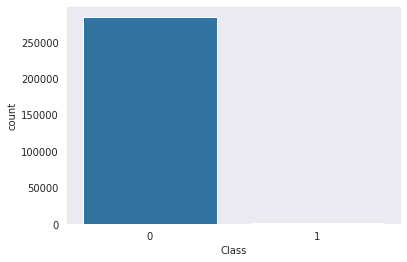

In [6]:
#Verificar balanceamento do dataset
print("1 - Fraude: {:.2%} \n2 - Normal: {:.2%}\n\n".format(df[df.Class ==1].shape[0] / df.Class.shape[0] , 1 - (df[df.Class ==1].shape[0] / (df.Class.shape[0]))))

#Gerar gráfico com balanceamento dos dados para transações Normais ou Fraudes
sns.countplot('Class', data=df);

O gráfico confirma a informação inicial sobre o desbalanceamento dos dados, onde somente 0.17% são Fraudes e os demais transações normais. O que indica que teremos que realizar um balanceamento nos dados para conseguimos uma boa performance no algoritimo.

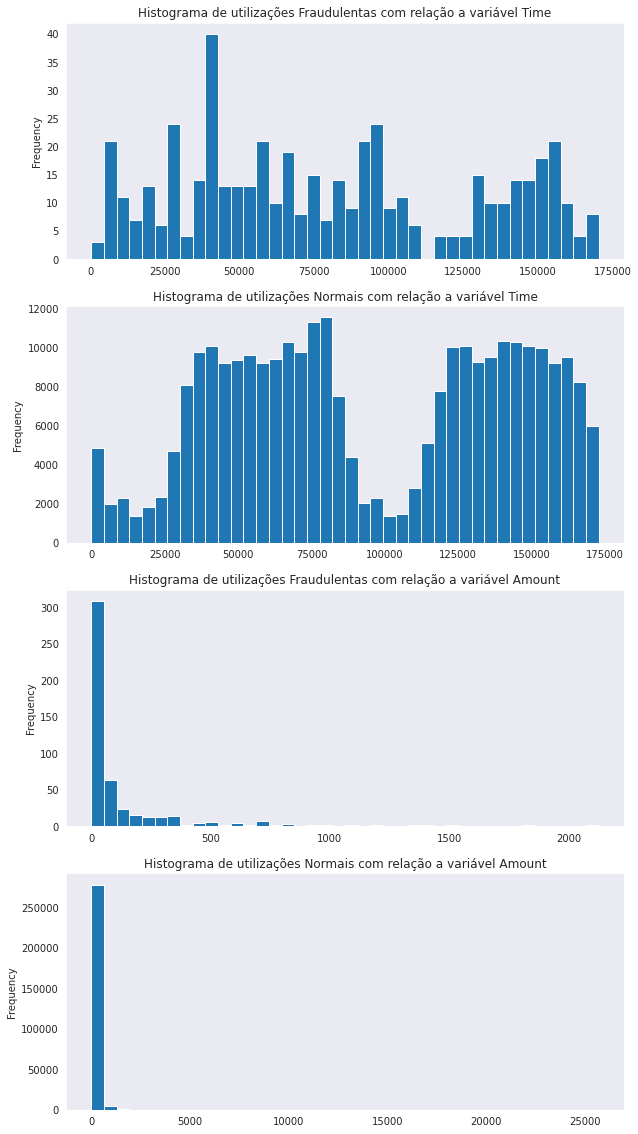

In [7]:
#Plotar figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize=(10,20))

#Plotar histograma
#Histograma para Class == Fraude com relação a variável Time
df.loc[df['Class'] == 1].Time.plot(kind='hist', ax=ax1, bins = 40)
ax1.set_title('Histograma de utilizações Fraudulentas com relação a variável Time')
#Histograma para Class == Normal com relação a variável Time
df.loc[df['Class'] == 0].Time.plot(kind='hist', ax=ax2, bins = 40)
ax2.set_title('Histograma de utilizações Normais com relação a variável Time')
#Histograma para Class == Fraude com relação a variável Amount
df.loc[df['Class'] == 1].Amount.plot(kind='hist', ax=ax3, bins = 40)
ax3.set_title('Histograma de utilizações Fraudulentas com relação a variável Amount')
#Histograma para Class == Normal com relação a variável Amount
df.loc[df['Class'] == 0].Amount.plot(kind='hist', ax=ax4, bins = 40)
ax4.set_title('Histograma de utilizações Normais com relação a variável Amount');

Os gráficos acima indicam que em transações fraudulentas temos um comportamento diferenciado, o que é um ponto positivo para aplicarmos Machine Learning.

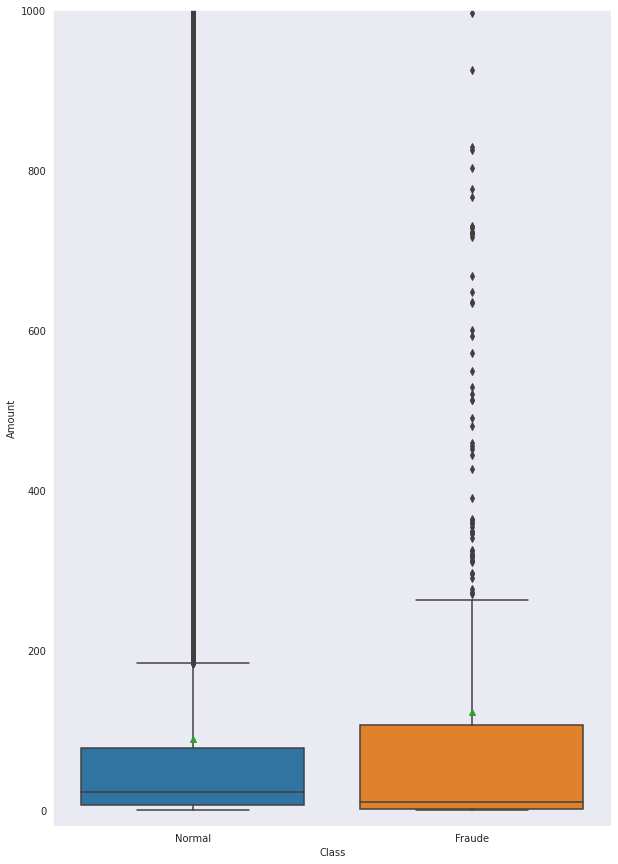

In [8]:
#Plotar figure
fig, ax = plt.subplots(figsize=(10,15))

#Plotar boxplot de Class = Fraude com relação a variável Amount
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 1000))
plt.xticks([0, 1], ['Normal', 'Fraude']);

Conseguimos enxergar que em transações fraudulentas temos uma média de valores inferior as transações normais, provavelmente uma forma dos infratores tentarem passar despercebidos pelas operadoras de cartões de crédito, tentarem enganar os algoritimos.

In [0]:
#Criar matriz de correlação das variáveis
corr = df.corr()

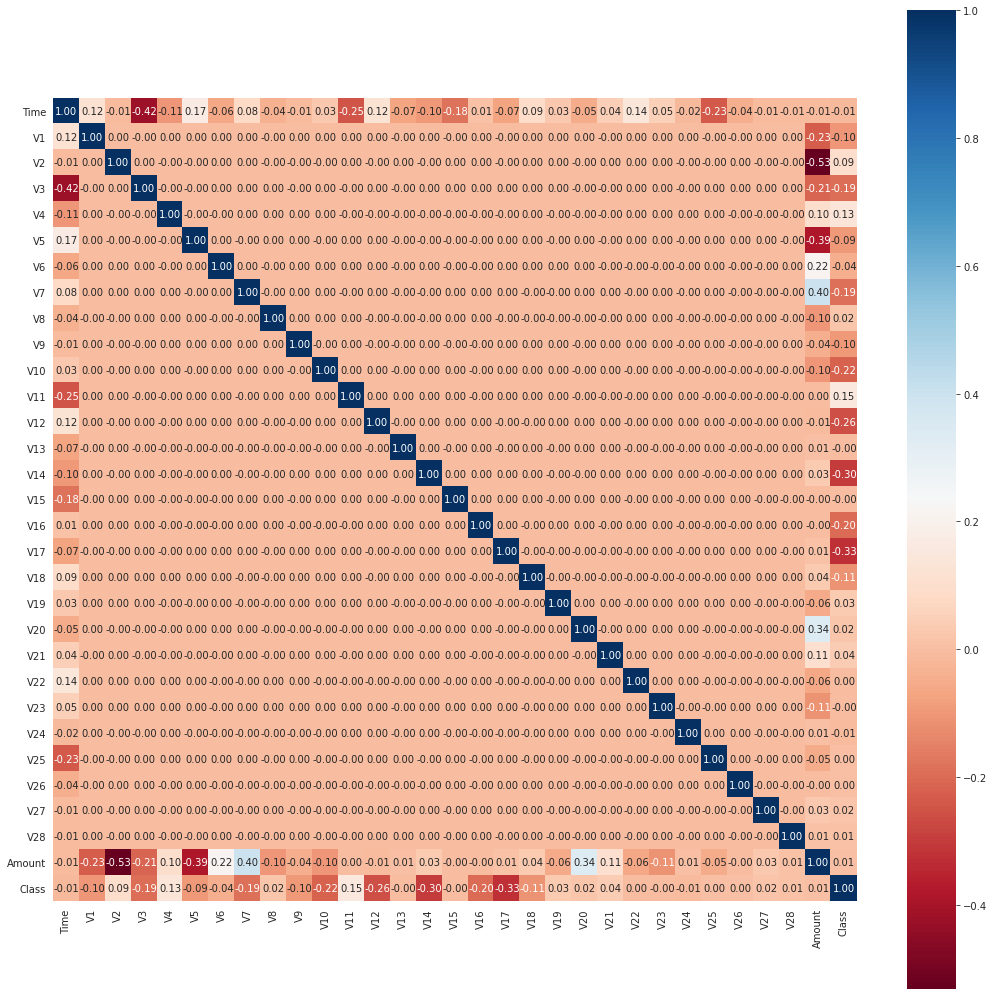

In [10]:
#Plotar figure
fig, ax = plt.subplots(figsize=(18,18))

#Plotar heatmap de correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

O heatmap nos mostra uma baixa correlação entre as variáveis, provavelmente devido ao desbalanceamento dos dados.

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

In [11]:
#Importar bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler;

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


1    361
0    361
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


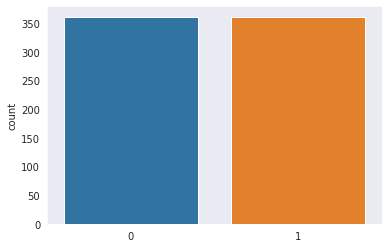

In [37]:
#Normalizar dados, onde dataset menos sua média, dividido pelo desvio padrão
df['Time'] = (df["Time"] - df['Time'].mean()) / df['Time'].std()
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

#Definir X e y
X = df.drop('Class', axis=1)
y = df['Class'] 

#Definir dataset de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

# usar técnica under-sampling para balancear os dados, nesta técnica iremos manter nossos dados de minoria, e iremos colher a mesma quantidade de dados da maioria
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

Após normalização e balanceamento dos dados, temos um dataset com 722‬ entradas, onde 50% é normal e 50% fraudes.

## Modelo de Machine Learning

* Construir um modelo para **classificação**.
* [*Opcional*] Construir mais de um modelo para avaliar os desempenhos

In [0]:
# Treinar um modelo de Regressão Logística
model = LogisticRegression(C=1.0)
model.fit(X_rus, y_rus)

# Fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)

## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

In [39]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9770    0.9883     71071
           1     0.0683    0.9160    0.1271       131

    accuracy                         0.9769     71202
   macro avg     0.5341    0.9465    0.5577     71202
weighted avg     0.9981    0.9769    0.9867     71202



## Conclusão

* Após tratarmos os dados normalizando as variáveis Time e Amount, e utilizar técnica under-sampling, que se propoe a manter os dados de minoria e coletar a mesma quantidade dos dados da maioria, conseguimos obter uma boa performance no algoritimo de Machine Learning, com uma acurácia de ,9769%, nosso recall para fraudes ainda não está com uma ótima performance, mas será o próximo desafio.